## Importando bibliotecas

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Lendo arquivo

In [48]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Descrição dos dados

In [49]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [50]:
train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [51]:
train.shape

(13730, 167)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [53]:
notas = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [54]:
correlacao = train[notas].corr()
correlacao

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_MT,1.000000,0.584941,0.529594,0.494695,0.379376,0.299402,0.335638,0.350307,0.342282,0.343337
NU_NOTA_CN,0.584941,1.000000,0.609543,0.545667,0.459938,0.357672,0.412894,0.429447,0.407747,0.416349
NU_NOTA_CH,0.529594,0.609543,1.000000,0.692988,0.550582,0.443809,0.488050,0.510452,0.488797,0.494798
NU_NOTA_LC,0.494695,0.545667,0.692988,1.000000,0.512908,0.430603,0.453262,0.475390,0.467356,0.441696
NU_NOTA_REDACAO,0.379376,0.459938,0.550582,0.512908,1.000000,0.862744,0.918278,0.925813,0.914505,0.816248
NU_NOTA_COMP1,0.299402,0.357672,0.443809,0.430603,0.862744,1.000000,0.756664,0.759452,0.824538,0.558587
NU_NOTA_COMP2,0.335638,0.412894,0.488050,0.453262,0.918278,0.756664,1.000000,0.875447,0.808006,0.655915
NU_NOTA_COMP3,0.350307,0.429447,0.510452,0.475390,0.925813,0.759452,0.875447,1.000000,0.827151,0.664350
NU_NOTA_COMP4,0.342282,0.407747,0.488797,0.467356,0.914505,0.824538,0.808006,0.827151,1.000000,0.635018
NU_NOTA_COMP5,0.343337,0.416349,0.494798,0.441696,0.816248,0.558587,0.655915,0.664350,0.635018,1.000000


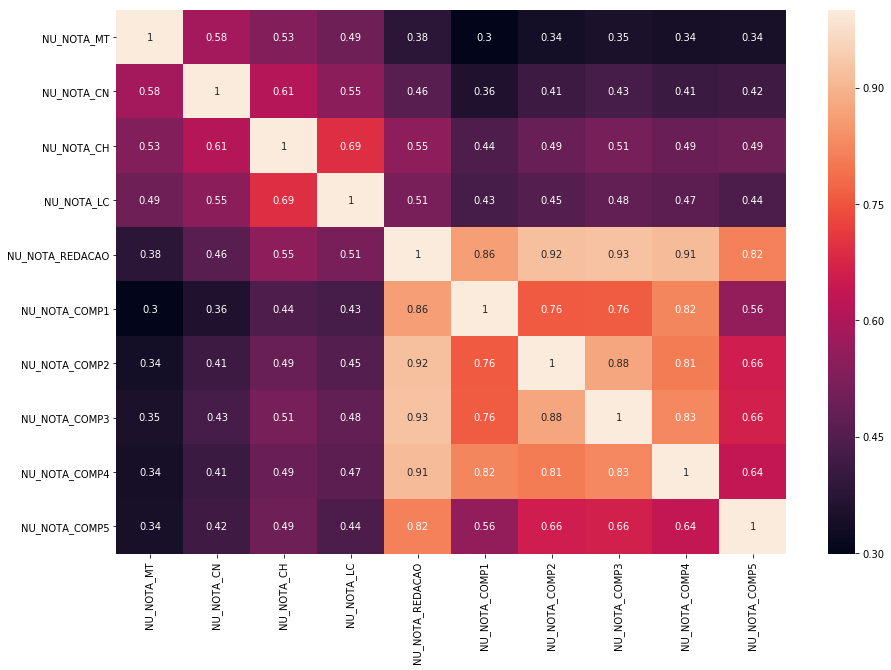

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(correlacao, annot=True)

In [56]:
train[notas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 10 columns):
NU_NOTA_MT         10133 non-null float64
NU_NOTA_CN         10341 non-null float64
NU_NOTA_CH         10341 non-null float64
NU_NOTA_LC         10133 non-null float64
NU_NOTA_REDACAO    10133 non-null float64
NU_NOTA_COMP1      10133 non-null float64
NU_NOTA_COMP2      10133 non-null float64
NU_NOTA_COMP3      10133 non-null float64
NU_NOTA_COMP4      10133 non-null float64
NU_NOTA_COMP5      10133 non-null float64
dtypes: float64(10)
memory usage: 1.0 MB


In [57]:
test[notas[1:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 9 columns):
NU_NOTA_CN         3442 non-null float64
NU_NOTA_CH         3442 non-null float64
NU_NOTA_LC         3377 non-null float64
NU_NOTA_REDACAO    3377 non-null float64
NU_NOTA_COMP1      3377 non-null float64
NU_NOTA_COMP2      3377 non-null float64
NU_NOTA_COMP3      3377 non-null float64
NU_NOTA_COMP4      3377 non-null float64
NU_NOTA_COMP5      3377 non-null float64
dtypes: float64(9)
memory usage: 321.8 KB


## Tratando dados

In [58]:
# nulos
train[notas].isna().sum()

NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [59]:
test[notas[1:]].isna().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

In [60]:
# substitui notas faltantes por 0
for nota in notas:
    train[nota].fillna(0, inplace = True)

train[notas].isna().sum()

NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [61]:
# substitui notas faltantes por 0
for nota in notas[1:]:
    test[nota].fillna(0, inplace = True)

test[notas[1:]].isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [84]:
# separa dados de treino e teste
matematica = notas[0]
features = notas[1:]

X = train[features]
y = train[[matematica]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=666)

## Criando modelo

In [85]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
resultado_modelo = modelo.predict(X_test)
resultado_modelo

array([[506.34190803],
       [542.29508274],
       [457.88803424],
       ...,
       [519.33629232],
       [566.71683719],
       [475.57182779]])

In [87]:
# metrica r2 score
r2_score(y_test, resultado_modelo)

0.9018545394320905

In [88]:
# metrica mean squared root
mean_squared_error(y_test, resultado_modelo)

5129.700511803687

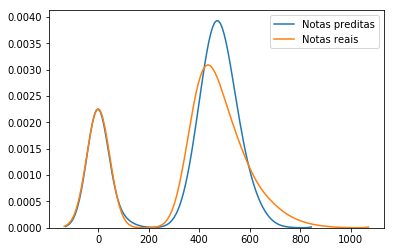

In [89]:
sns.distplot(resultado_modelo, label='Notas preditas', hist=False)
sns.distplot(y_test, label='Notas reais', hist=False) 
plt.show()

In [90]:
to_predict = pd.get_dummies(test[features])
predict_test = modelo.predict(to_predict)
predict_test

array([[423.00760051],
       [482.26662313],
       [561.56265176],
       ...,
       [590.77651343],
       [488.88162935],
       [ -2.23012609]])

In [91]:
test[matematica] = predict_test.round(3)

test[matematica].head()

0    423.008
1    482.267
2    561.563
3     -2.230
4    546.709
Name: NU_NOTA_MT, dtype: float64

In [92]:
resultado = test[['NU_INSCRICAO', matematica]]
resultado.set_index('NU_INSCRICAO', inplace=True)
resultado.head()

,NU_NOTA_MT
NU_INSCRICAO,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,423.008
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,482.267
b38a03232f43b11c9d0788abaf060f7366053b6d,561.563
70b682d9a3636be23f6120fa9d6b164eb3c6002d,-2.230
715494628a50142ce8cb17191cfe6d0f3cae0934,546.709


In [93]:
resultado.to_csv('answer.csv')